# A case study on loan loss analysis of a community bank
## by (Osama Abdu AlBaset AlShihabi)

## Investigation Overview

> we conduct a case study on a community bank by the conditions structure for historical loan losses to banks and the loan quality classification matrix used by the bank.

## Dataset Overview

> Data source from Commercial Bank provided by Google.The dataset consisted of borrower and attributes of 113,937 loans. Basic statistical analysis of loan losses based on the internal loan quality rating system for banks is presented.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# convert ProsperRating and EmploymentStatus into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA'],
                    'EmploymentStatus': ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans[var] = loans[var].astype(ordered_var)

In [4]:
loans_clean = loans.copy()
loans_clean.drop(['ListingKey','ListingNumber','ListingCreationDate','EstimatedReturn',
                  'ProsperRating (numeric)','BorrowerState','EmploymentStatusDuration',
                  'CurrentlyInGroup','GroupKey','CreditScoreRangeLower','CreditScoreRangeUpper',
                  'FirstRecordedCreditLine','CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years',
                  'OpenRevolvingAccounts','OpenRevolvingMonthlyPayment','InquiriesLast6Months','TotalInquiries',
                  'CurrentDelinquencies','AmountDelinquent','BankcardUtilization','LoanKey','ProsperPrincipalOutstanding',
                  'LoanNumber','LoanOriginationDate','LoanOriginationQuarter','MemberKey',
                  'LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees','LP_ServiceFees',
                  'LP_CollectionFees','LP_GrossPrincipalLoss','LP_NonPrincipalRecoverypayments',
                  'Recommendations','InvestmentFromFriendsCount','InvestmentFromFriendsAmount',
                  'ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber',
                  'ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate',
                  'CreditGrade','PercentFunded','DateCreditPulled','PublicRecordsLast10Years','PublicRecordsLast12Months',
                  'RevolvingCreditBalance','AvailableBankcardCredit'
                 ],axis=1, inplace = True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## number of categorized loans in the organization 

> find out the number of loans in the organization, loans are categorized based on the number of customers that the institution provides them with!

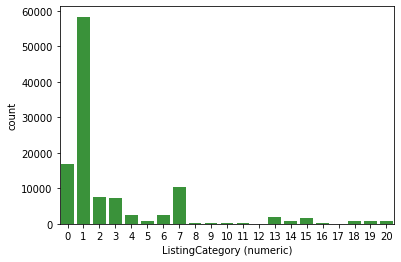

In [6]:
base_color = sb.color_palette()[2]
sb.countplot(data = loans_clean, x = 'ListingCategory (numeric)', color = base_color);

## Estimate the losses with a higher degree of risk

> The degree of custom risk created with Prosper data. The score ranges from 1 to 10, with 10 being the best or lowest risk score.Where the results show that the percentage of loss is higher for private customers (0-0.2).

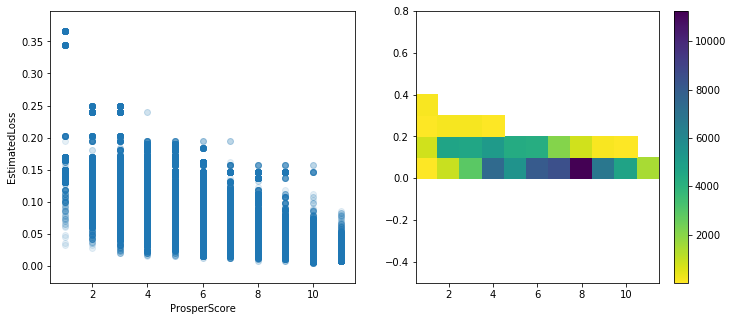

In [7]:
plt.figure(figsize = [12, 5])

# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1, 2, 1)
sb.regplot(data = loans_clean, x = 'ProsperScore', y = 'EstimatedLoss', fit_reg = False,
            scatter_kws = {'alpha' : 1/9})

# right plot: heat map with bin edges between values
plt.subplot(1, 2, 2)
bins_x = np.arange(0.5, loans_clean.ProsperScore.max()+1, 1)
bins_y = np.arange(-0.5, loans_clean.EstimatedLoss.max()+0.5, 0.1)
plt.hist2d(data = loans_clean, x = 'ProsperScore', y = 'EstimatedLoss',
           bins = [bins_x, bins_y],cmap = 'viridis_r', cmin = 0.5)
plt.colorbar();

## Increasing the number of investors leads to an increase in project success

> Through research and analysis we found that the project obtained 6 - automatic, 17 - rack, 14 - large purchases, 12 - green loans and 9 - boat brings more investors and occupies the advanced ranks of loans, while other loans occupy the last ranks.

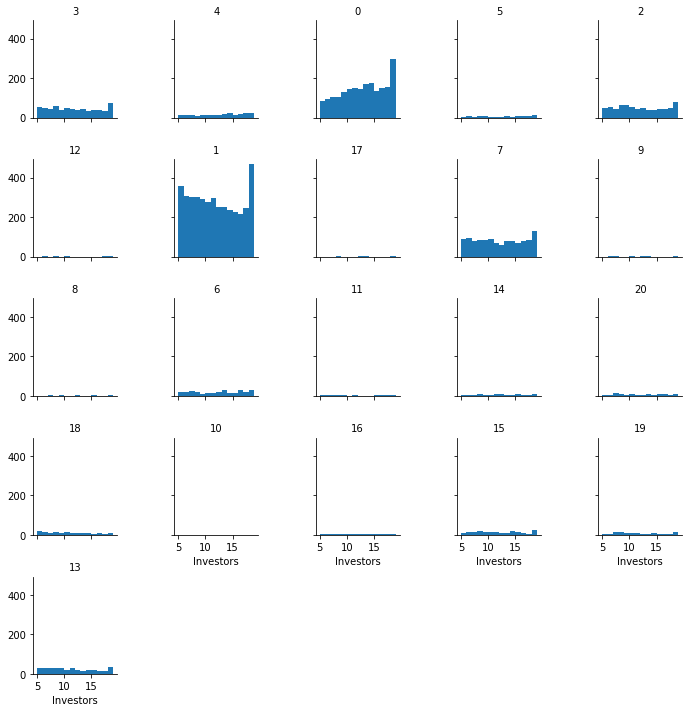

In [10]:
group_means=loans_clean.groupby(['ListingCategory (numeric)']).mean()
group_order = group_means.sort_values(['Investors'], ascending = False).index
g = sb.FacetGrid(data = loans_clean, col = 'ListingCategory (numeric)', col_wrap = 5, size = 2,
                 col_order = group_order)
g.map(plt.hist, 'Investors',bins = np.arange(5, 5+15, 1))
g.set_titles('{col_name}');

##  two factors To determine the severity of loan losses in Finance

> What is the severity of loan losses during exposure to refund rates (LP_NetPrincipalLoss) also what is the Defaulted rate (MonthlyLoanPayment).The higher the refund, the greater the monthly payment.

<Figure size 576x432 with 0 Axes>

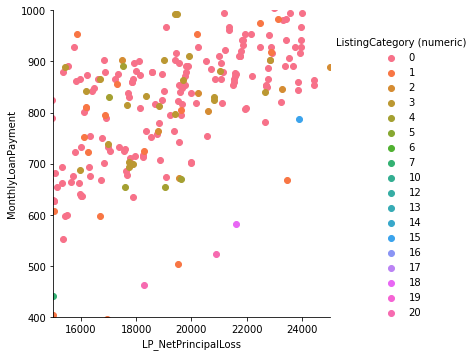

In [11]:
plt.figure(figsize = [8,6])
g = sb.FacetGrid(data = loans_clean.query('LoanStatus=="Defaulted"'), hue = 'ListingCategory (numeric)', size = 5)
g.map(plt.scatter, 'LP_NetPrincipalLoss', 'MonthlyLoanPayment')
plt.xlim(15000,25000)
plt.ylim(400,1000)
g.add_legend();

Although the product we are studying is group loan, loans in the database are treated individually for each individual customer. Therefore, in our analysis, the whole society is granted a loan. The losses of some of the simulated portfolios may be estimated to be higher or less than what they are, except that we did not consider the group's impact.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!